# Application of AIML in Healthcare

# 1. Import the necessary libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2. Read the data as a data frame


In [16]:
h_df = pd.read_csv('insurance.csv')
h_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Perform basic EDA 

In [3]:
# a. Shape of the data

In [4]:
h_df.shape

(1338, 7)

In [5]:
# b. Data type of each attribute

In [6]:
h_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# c. Checking the presence of missing values

In [8]:
h_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#There are no null values.

In [10]:
# d. 5 point summary of numerical attributes

In [11]:
h_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [12]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [13]:
from scipy.stats import skew
h_df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

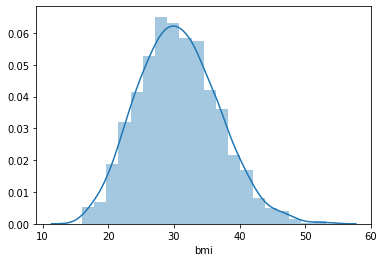

In [11]:
sns.distplot(h_df['bmi'],bins=20);

In [ ]:
#Plot is perfect bell curve and so mean, median and mode are almost equal.
#no outliers

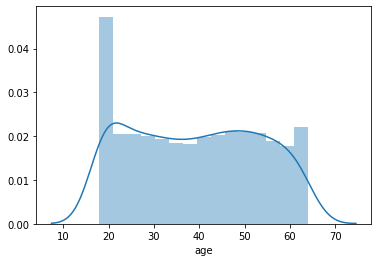

In [12]:
sns.distplot(h_df['age'],bins=15);

In [ ]:
#Data value is similar across age 18 to 63

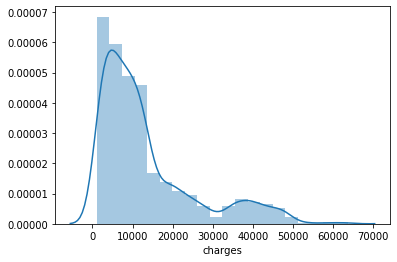

In [13]:
sns.distplot(h_df['charges'],bins=20);

In [ ]:
#Right skewed graph
#Data is concentrated between 0 to 50000

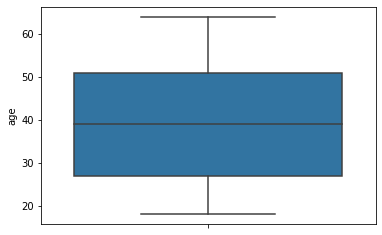

In [14]:
sns.boxplot(y= h_df['age'])

In [16]:
print(h_df['age'].max())
print(h_df['age'].min())

64
18


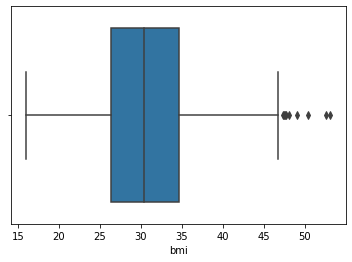

In [17]:
sns.boxplot(x= h_df['bmi'])

In [ ]:
#There are outliers in bmi

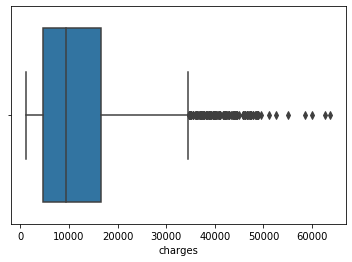

In [18]:
sns.boxplot(x= h_df['charges'])

In [ ]:
#There are also outliers for charges

# 4. Answer the following questions with statistical evidence
a. Do charges of people who smoke differ significantly
from the people who don't?

b. Does bmi of males differ significantly from that of
females?

c. Is the proportion of smokers significantly different
in different genders?

d. Is the distribution of bmi across women with no
children, one child and two children, the same ?

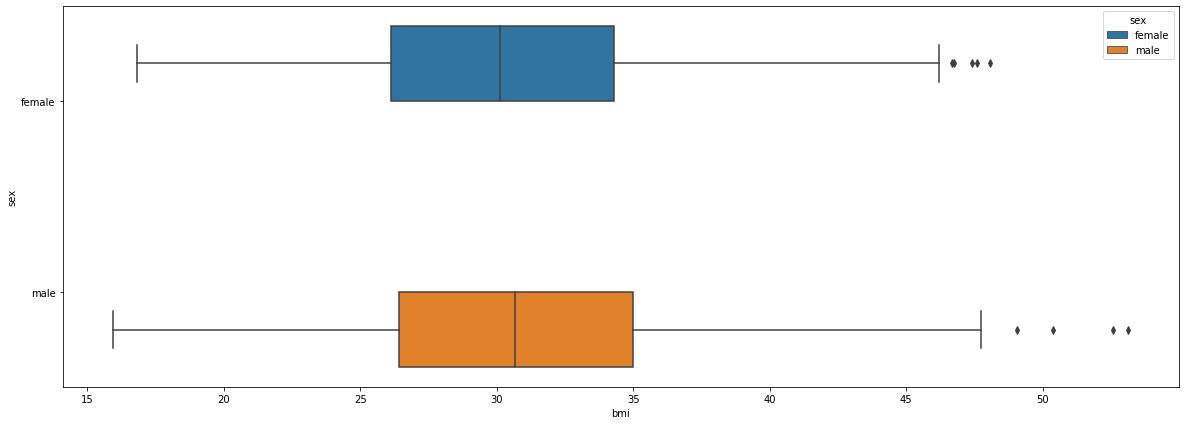

In [21]:
plt.figure(figsize=(20,7))
sns.boxplot(x='bmi',y='sex',hue='sex',data= h_df)

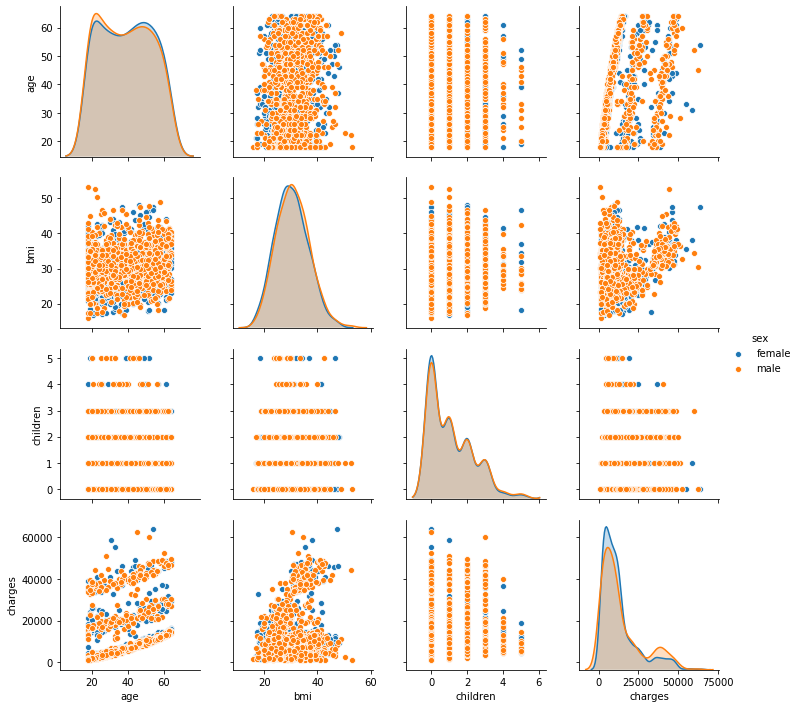

In [22]:
sns.pairplot(data= h_df, hue="sex")

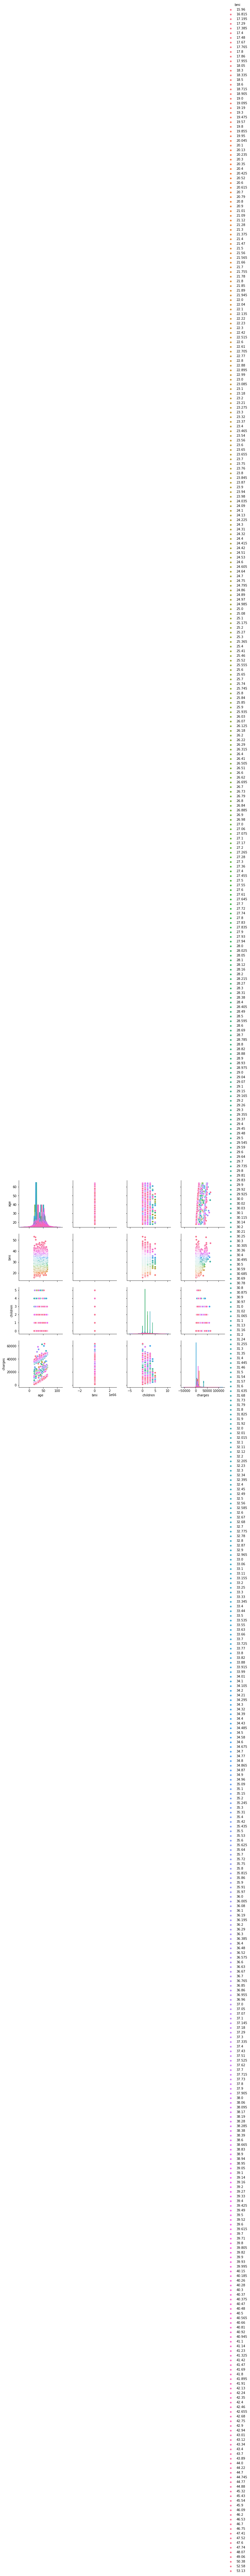

In [14]:
sns.pairplot(data= h_df, hue="bmi")

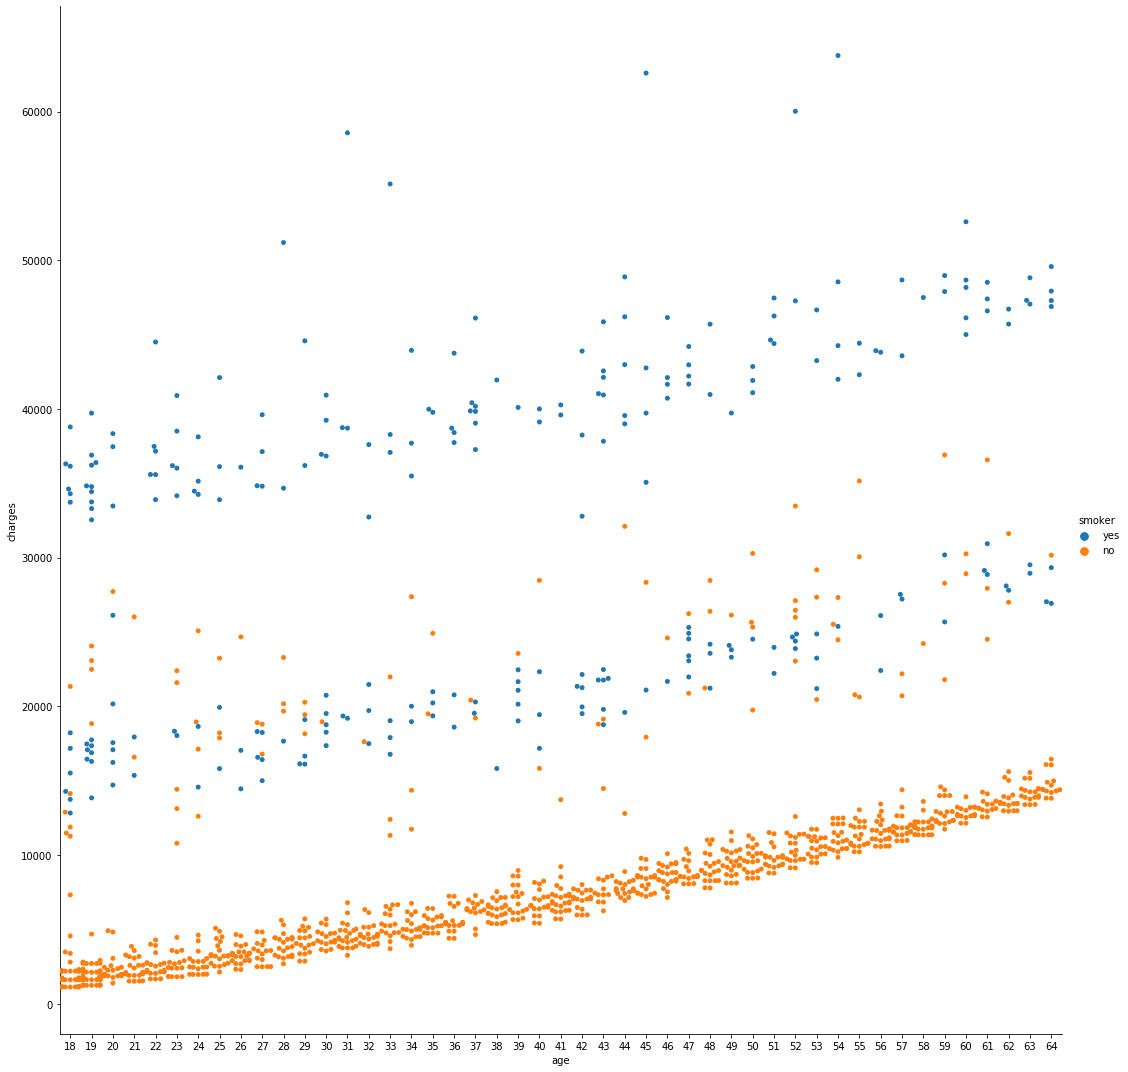

In [15]:
sns.catplot(x='age', y='charges', hue ='smoker', data = h_df, kind='swarm', height=15, aspect=1)

In [16]:
#This graph shows that the charges of smokers is high as compared to non-smokers

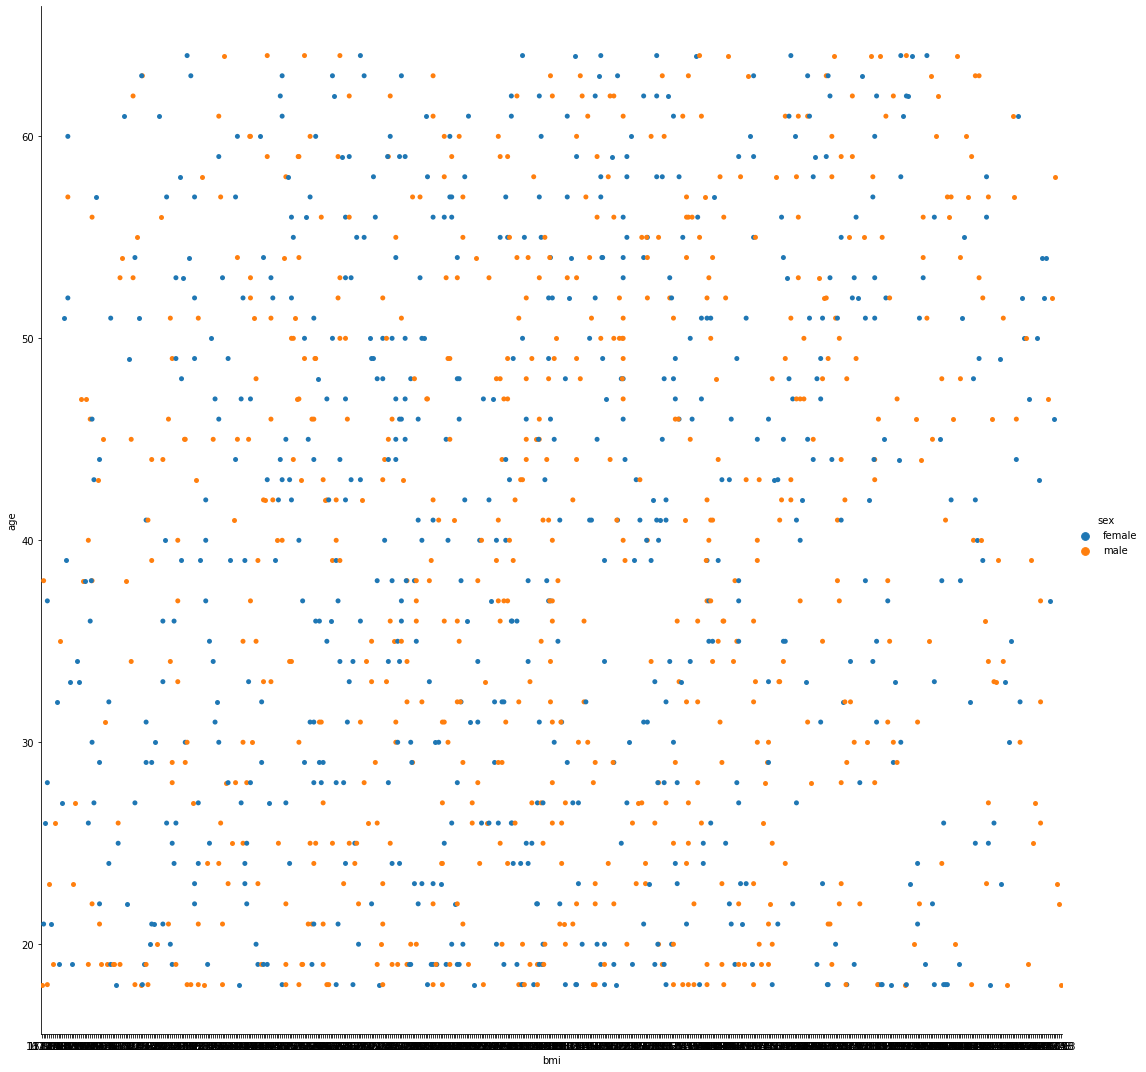

In [18]:
sns.catplot(x='bmi', y='age', hue ='sex', data = h_df, kind='swarm', height=15, aspect=1)

In [19]:
#In this graph we can see dots are distributed all over the plot so it shows that BMI will not differ with respect to sex

In [20]:
h_df.groupby(by=['smoker','sex'], as_index=False).count()

,smoker,sex,age,bmi,children,region,charges
0,no,female,547,547,547,547,547
1,no,male,517,517,517,517,517
2,yes,female,115,115,115,115,115
3,yes,male,159,159,159,159,159


In [21]:
# proportion of smokers does not differ with respect to sex 
# Total Male smokers are 159
# total female smokers are 115

In [22]:
print(h_df[h_df['children'] == 0].describe())
print(h_df[h_df['children'] == 1].describe())
print(h_df[h_df['children'] == 2].describe())

              age         bmi  children       charges
count  574.000000  574.000000     574.0    574.000000
mean    38.444251   30.550296       0.0  12365.975602
std     16.436228    6.039106       0.0  12023.293942
min     18.000000   15.960000       0.0   1121.873900
25%     22.000000   26.143750       0.0   2734.421150
50%     36.000000   30.302500       0.0   9856.951900
75%     55.000000   34.746250       0.0  14440.123825
max     64.000000   53.130000       0.0  63770.428010
              age         bmi  children       charges
count  324.000000  324.000000     324.0    324.000000
mean    39.453704   30.623148       1.0  12731.171832
std     12.067445    6.101435       0.0  11823.631451
min     18.000000   16.815000       1.0   1711.026800
25%     30.000000   26.615000       1.0   4791.643175
50%     40.000000   30.015000       1.0   8483.870150
75%     49.000000   34.237500       1.0  15632.052050
max     64.000000   52.580000       1.0  58571.074480
              age         bm

In [23]:
h_df.groupby(by=['children','sex'], as_index=False).count()

,children,sex,age,bmi,smoker,region,charges
0,0,female,289,289,289,289,289
1,0,male,285,285,285,285,285
2,1,female,158,158,158,158,158
3,1,male,166,166,166,166,166
4,2,female,119,119,119,119,119
5,2,male,121,121,121,121,121
6,3,female,77,77,77,77,77
7,3,male,80,80,80,80,80
8,4,female,11,11,11,11,11
9,4,male,14,14,14,14,14


In [24]:
#the above graph shows that for 1, 2 and 3 children BMI number has changed but not the effect of BMI can be seen for this change